# Chpater 6. 비지도 학습
- 타깃이 없는 데이터를 사용하는 비지도 학습과 대표적인 알고리즘을 소개
- 대표적인 군집 알고리즘인 k-평균을 소개
- 대표적인 차원 축소 알고리즘인 주성분 분석(PCA)를 소개

## 06-1. 군집 알고리즘
- 타깃을 모르는 사진을 종류별로 분류 
- 비지도 학습 Unsupervised learning : 타깃이 없을 때 사용하는 머신러닝 알고리즘

In [2]:
# 데이터 준비 
import numpy as np
import matplotlib.pyplot as plt

- 과일 데이터는 사과, 바나나, 파인애플을 담고 있는 흑백 사진
- 이 데이터는 넘파이 배열의 기본 저장 포맷인 `npy` 파일로 저장

In [ ]:
fruits = np.load('./data/fruits_300.npy')

In [4]:
print(fruits.shape)

(300, 100, 100)


- 이 배열의 첫 번째 차원(300)은 샘플의 개수를 나타내고, 두 번째 차원(100)은 이미지 높이, 세 번 
째 차원(100)은 이미지 너비를 나타냄

![alt text](appendix/image-13.png)

In [ ]:
# 첫 번째 행에 있는 픽셀 100개에 들어 있는 값을 출력
print(fruits[0, 0, :])

[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1
   2   2   2   2   2   2   1   1   1   1   1   1   1   1   2   3   2   1
   2   1   1   1   1   2   1   3   2   1   3   1   4   1   2   5   5   5
  19 148 192 117  28   1   1   2   1   4   1   1   3   1   1   1   1   1
   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]


- 첫 번째 행에 있는 픽셀 100개에 들어 있는 값을 출력
- 넘파이 배열은 흑백 사진을 담고 있으므로 0〜255까지의 정숫값을 가짐

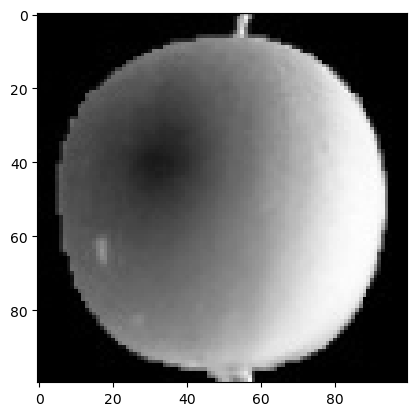

In [10]:
plt.imshow(fruits[0], cmap='gray')
plt.show()

- 보통 흑백 샘플 이미지는 바탕이 밝고 물체(여기서는 사과)가 짙은 색임
- 사진으로 찍은 이미지를 넘파이 배열로 변환할 때 반전시킨 것임 
    - 사진의 흰 바탕 (높은 값)은 검은색 (낮은 값)으로 만들고 실제 사과가 있어 짙은 부분（낮은 값）은 밝은색 （높은 값）으로 바꾸었습니다
    - 이유는 관심 대상이 사과이기 때문에 사과의 값을 흰색(255에 가깝게) 바꿈
- 알고리즘이 어떤 출력을 만들기 위해 곱셈, 덧셈을 함 
- 픽셀값이 0이면 출력도 0이 되어 의미가 없기 때문에 픽셀값이높으면 출력값도 커지기 때문에 의미를 부여

- 관심 대상의 영역을 높은 값으로 바꾸었지만 `matplotlib`으로 출력할 때 바탕이 검게 나오므 
로 보기 좋게 하기 위해 `cmap` 매개변수를 ‘gray_r’로 지정하여 보기 좋게 출력

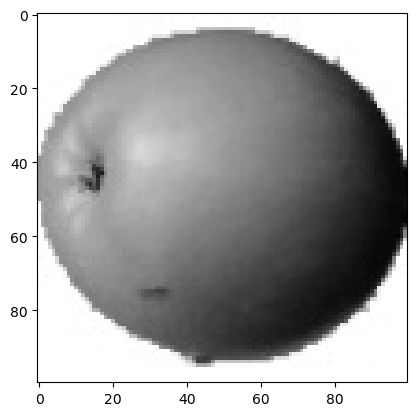

In [17]:
plt.imshow(fruits[90], cmap='gray_r')
plt.show()

- **이 그림에서 밝은 부분이 0에 가깝고 짙은 부분이 255에 가까운 값**인걸 주의

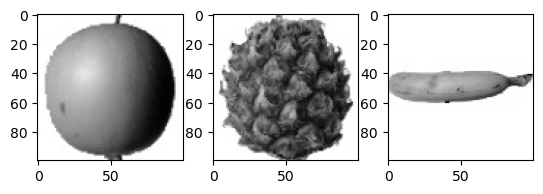

In [26]:
fig, axs = plt.subplots(1, 3) # 여러개의 그래프; 1나의 행과 3개의 열
axs[0].imshow(fruits[0], cmap='gray_r')
axs[1].imshow(fruits[100], cmap='gray_r')
axs[2].imshow(fruits[200], cmap='gray_r')
plt.show()

### 픽셀값 분석하기
- 넘파이 배열을 나눌 때 100 x 100 이미지를 펼쳐서 길이가 10,000인 1차원 배열로 변환
- 이미지로 출력은 어렵지만 계산은 편리함

![alt text](appendix/image-14.png)

- fruits 배열에서 순서대로 100개씩 선택하기 위해 슬라이싱 연산자를 사용
- 그다음 `reshape()` 메서드를 사용해 두 번째 차원(100)과 세 번째 차원(100)을 10,000으로 합침 
- 첫 번째 차원을 -1로 지정하면 자동으로 남은 차원을 할당합니다. 여기에서는 첫 번째 차원이 샘플 
개수입

In [27]:
apple = fruits[0:100].reshape(-1, 100*100)
pineapple = fruits[100:200].reshape(-1, 100*100) 
banana = fruits[200:300].reshape(-1, 100*100)

In [28]:
print(apple.shape)

(100, 10000)


- 변환된 데이터를 통해 apple, pineapple, banana 배열에 들어 있는 샘플들의 픽셀 평균값을 계산

#### axis 옵션 
 ![alt text](appendix/image-15.png)

In [29]:
print(apple.mean(axis=1))

[ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823
 101.556  100.7027  91.6098  88.8976]


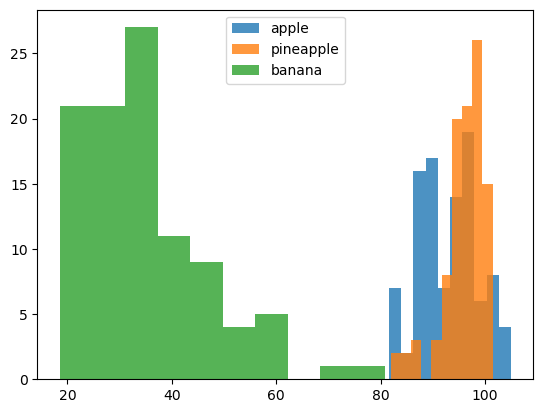

In [32]:
plt.hist(apple.mean(axis=1), alpha = 0.8, label='apple')
plt.hist(pineapple.mean(axis=1), alpha = 0.8, label='pineapple')
plt.hist(banana.mean(axis=1), alpha = 0.8, label='banana')
plt.legend()
plt.show()

- 바나나는 60이하에 많이 분포해 있는걸 볼 수 있음
- 사과, 파인애플은 90을 기준으로 분포가 다르지만 90이상에 겹치는 부분이 존재
    - 픽셀값 만으로 분류가 어려움


- 단순 픽셀값이 아닌 픽셀의 평균 값으로 구별

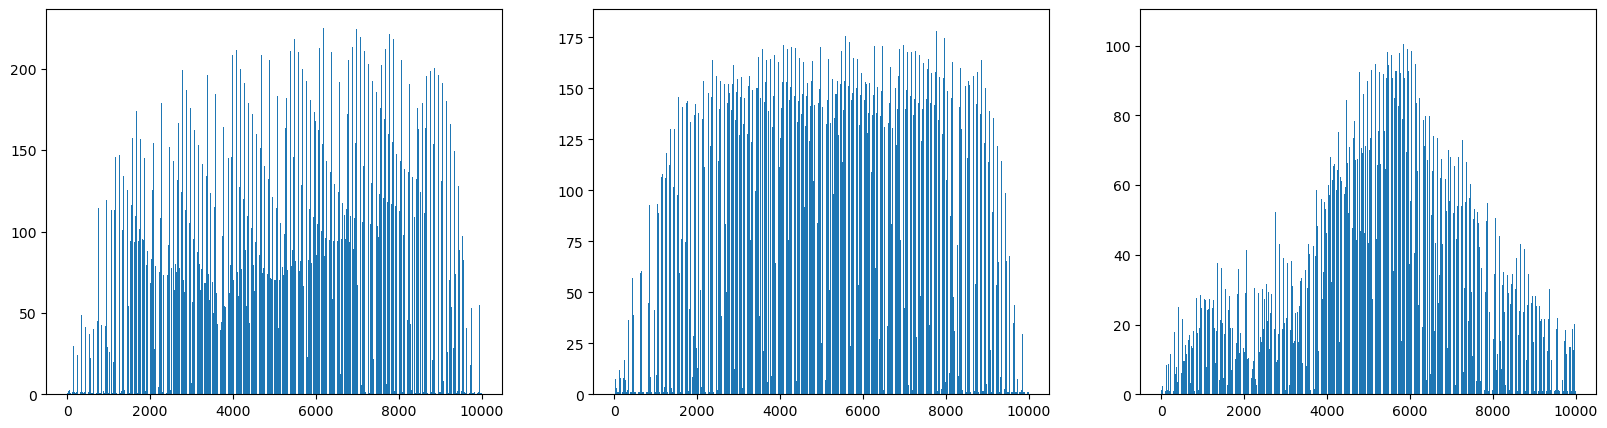

In [34]:
fig, axs = plt.subplots(1, 3, figsize=(20,5))
axs[0].bar(range(10000), apple.mean(axis=0))
axs[1].bar(range(10000), pineapple.mean(axis=0))
axs[2].bar(range(10000), banana.mean(axis=0)) 
plt.show()

- 사과는 높이가 낮아보임
- 파인애플은 전체적으로 높아보임
- 바나나는 가운데만 높아보임

- 정확한 비교를 위해 픽셀 평균 값을 $100 \times 100$ 으로 바꾸어 그래프와 비교하고자 함
    - 과일 별 픽셀 평균 값 = 모든 사진을 합쳐놓은 사과, 파인애플, 바나나 이미지라고 생각하면 편함

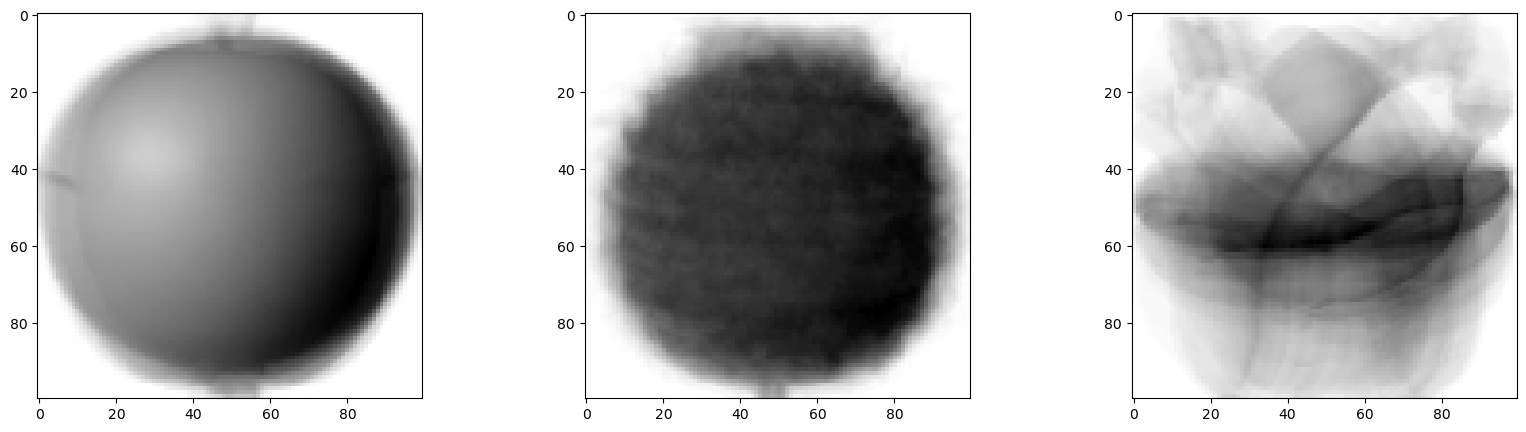

In [36]:
apple_mean = apple.mean(axis=0).reshape(100, 100)
pineapple_mean = pineapple.mean(axis=0).reshape(100, 100)
banana_mean = banana.mean(axis=0).reshape(100, 100) 
fig, axs = plt.subplots(1, 3, figsize=(20,5)) 
axs[0].imshow(apple_mean, cmap='gray_r') 
axs[1].imshow(pineapple_mean, cmap='gray_r') 
axs[2].imshow(banana_mean, cmap='gray_r') 
plt.show()

- 픽셀 위치에 따라 값의 크기가 차이남에 따라서 대표 이미지와 가까운 사진을 골라 
낸다면 사과, 파인애플, 바나나를 구분할 수 있을 것으로 판단

### 평균값과 가까운 사진 고르기
- 절댓값 오차를 이용하여 선정

In [37]:
abs_diff = np.abs(fruits - apple_mean)
abs_mean = np.mean(abs_diff, axis=(1, 2)) 
print(abs_mean.shape)

(300,)


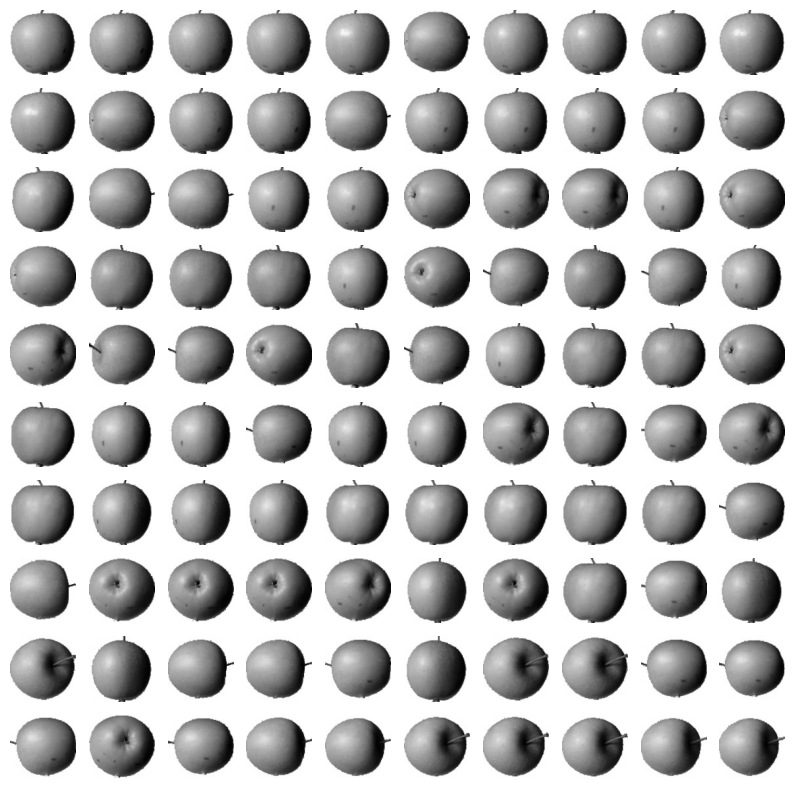

In [40]:
apple_index = np.argsort(abs_mean)[:100]
apple_index = apple_index.reshape(10, 10)

fig, axs = plt.subplots(10, 10, figsize=(10,10))
for i in range(10):
    for j in range(10):
        axs[i, j].imshow(fruits[apple_index[i, j]], cmap='gray_r') # 이미지 결과
        axs[i, j].axis('off') # 출력되는 축 삭제
plt.show()

- 군집 clustering : 비슷한 샘플끼리 그룹으로 모으는 작업
    - 군집은 대표적인 비지도 학습 작업 중 하나
- 클러스터 cluster : 군집 알고리즘에서 만든 그룹

## 06-2 k-평균
- 1단원에서 진행한 k-평균 군집 알고리즘을 통해 가까운 값들 끼리 clustering 진행
- 센트로이드 centroid, 클러스터 중심 cluster center: 클러스터의 중심 (평균 값)

1) 무작위로 k개의 클러스터 중심을 정함
2) 각 샘플에서 가장 가까운 클러스터 중심을 찾아 해당 클러스터의 샘플로 지정
3) 클러스터에 속한 샘플의 평균값으로 클러스터 중심을 변경
4) 클러스터 중심에 변화가 없을 때까지 2번으로 돌아가 반복

![alt text](appendix/image-16.png)

### KMeans 클래스
- 사이킷런의 k—평균 알고리즘은 `sklearn.cluster` 모듈 아래 KMeans 클래스에 구현됨
- `n_clusters` : 클러스터 개수 지정
- 비지도 학습이므로 `fit()` 메서드에 타깃 데이터를 사용하지 않음

In [41]:
fruits_2d = fruits.reshape(-1, 100*100)
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_2d)

KMeans(n_clusters=3, random_state=42)

- 군집된 결과는 KMeans 클래스 객체의 `labels_` 속성에 저장됩
- `labels_` 배열의 길이는 샘플 개수와 같음

In [42]:
print(km.labels_)

[2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


- `km.labels_`의 의의를 확인해 보기 위해 실제 레이블 0, 1, 2가 어떤 과일 사진을 
주로 모았는지 알아보려면 직접 이미지를 출력봐야함

In [43]:
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([112,  98,  90]))


- 첫 번째 클러스터 (레이블 0)가 112개 샘플
- 두 번째 클러스터 (레이블 1)가 98개의 샘플
- 세 번째 클러스터 (레이블 2)는 90개의 샘플

In [46]:
def draw_fruits(arr, ratio=1):
  n = len(arr) # n은 샘플 개수
  # 한 줄에 10개씩 이미지 그림. 샘플 개수를 10으로 나누어 전체 행 개수를 계산
  rows = int(np.ceil(n/10))
  # 행이 1개이면 열의 개수는 샘플 개수입니다. 그렇지 않으면 10개
  cols = n if rows < 2 else 10
  fig, axs = plt.subplots(rows, cols,
                          figsize=(cols*ratio, rows*ratio), squeeze=False)
  for i in range(rows):
    for j in range(cols):
        # n 개까지만 그립니다
        if i*10 + j < n: 
            axs[i, j].imshow(arr[i*10 + j], cmap='gray_r') 
        axs[i, j].axis('off')
  plt.show()

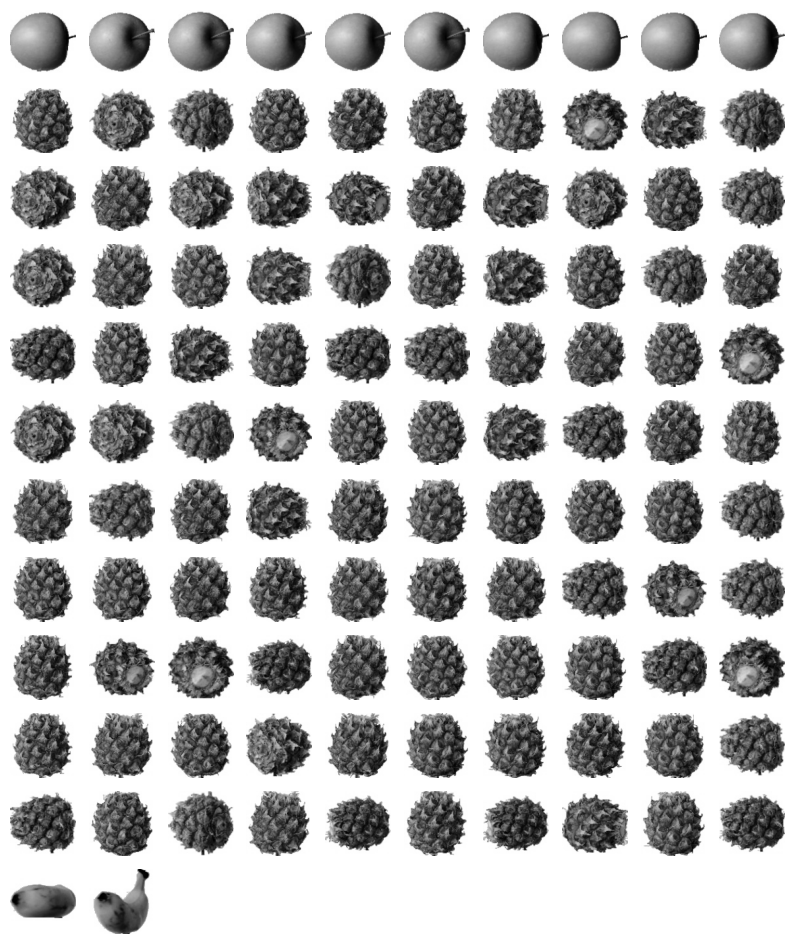

In [47]:
draw_fruits(fruits[km.labels_==0])

- 사과 10개, 바나나 2개가 섞임

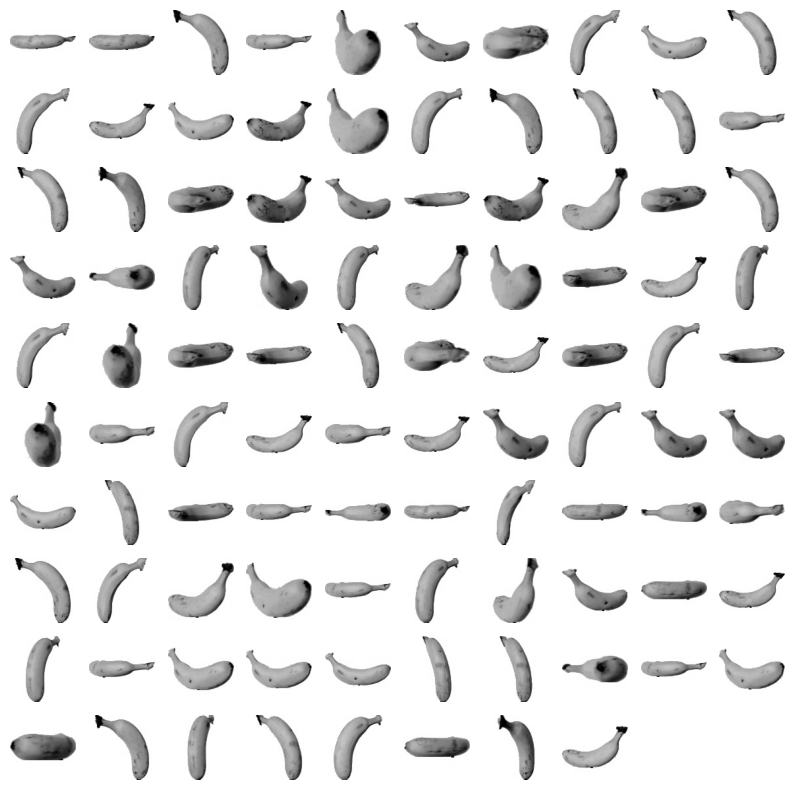

In [48]:
draw_fruits(fruits[km.labels_==1])

- 싹다 바나나로 분류됨

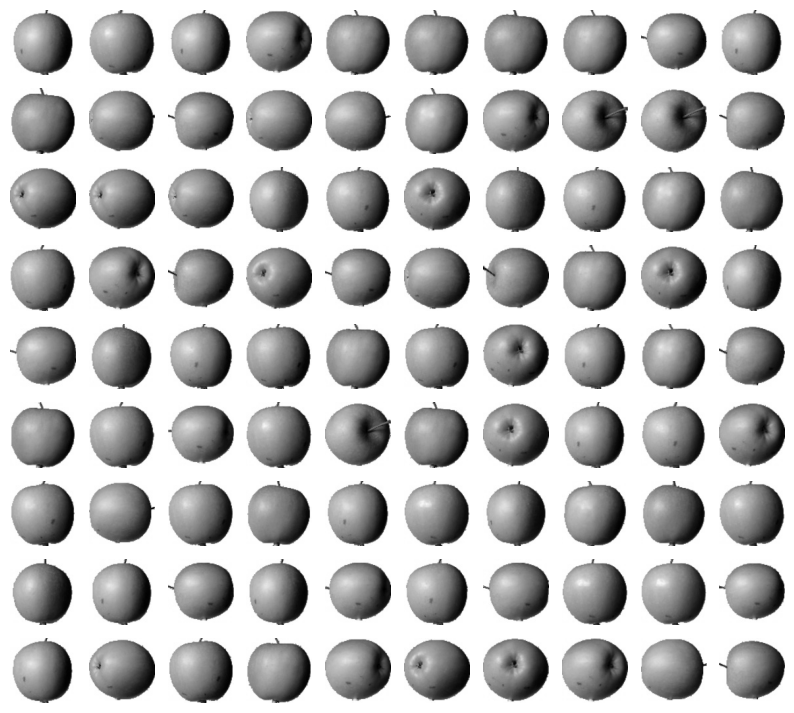

In [49]:
draw_fruits(fruits[km.labels_==2])

- 전부 사과로 분류 됨

- 훈련 데이터에 타깃 레이블을 전혀 제공하지 않았음에도 불구하고 잘 분류 된 것을 확인 할 수 있음

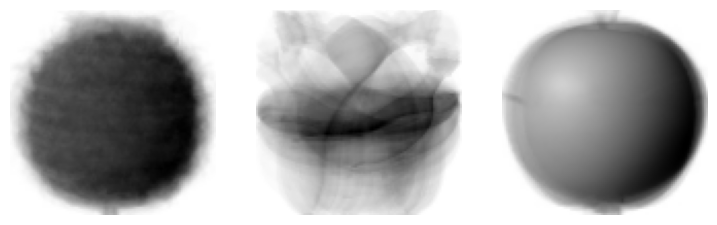

In [51]:
# 클러스터 중심 결과
draw_fruits(km.cluster_centers_.reshape(-1, 100, 100), ratio=3)

- 이전 사과, 바나나, 파인애플의 픽셀 평균값 출력 결과 참고(모양상 비슷하게 나옴)
- `KMeans` 클래스는 훈련 데이터 샘플에서 클러스터 중심까지 거리로 변환해 주는 `transform()` 메서드 가짐 -> 특성값을 변환하는 용도로 사용 가능
- 인덱스가 100인 샘플에 `transform()` 메서드를 적용하면 `fit()` 메서드와 마찬가지로 2차원 배열을 기대

- `fmits_2d[100]`처럼 쓰면 (10000,) 크기의 배열이 되므로 에러가 발생

In [52]:
print(km.transform(fruits_2d[100:101]))

[[3400.24197319 8837.37750892 5279.33763699]]


- 하나의 샘플을 전달하여 반환된 배열은 크기가 (1, 클러스터 개수)인 2차원 배열
- 첫번째 클러스터 (레이블 0) 평균값과의 거리 : 약 3400
- 두번째 클러스터 (레이블 1) 평균값과의 거리 : 약 8837
- 세번째 클러스터 (레이블 2) 평균값과의 거리 : 약 5279 

In [53]:
print(km.predict(fruits_2d[100:101]))

[0]


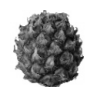

In [ ]:
draw_fruits(fruits[100:101])

In [55]:
# 알고리즘이 반복한 횟수
print(km.n_iter_)

4


### 최적 k 찾기
- 지금 전까지 타깃값을 사용하지 않았지만, 약간의 편법을 사용(파인애플, 사과, 바나나 3개니까 n_clusters를 3으로 지정한 편법) 즉 타깃에 대한 정보를 활용
- 실전에서는 클러스터 개수조차 알 수 없기에 그렇다면 `n_clusters`를 어떤 기준으로 지정해야할지 확인이 필요


#### 엘보우 elbow 방법
- 이너셔 inertia : 클러스터의 샘플이 얼마나 가깝게 있는지를 나타내는 값
    - 클러스터 중심과 클러스터에 속한 샘플 사이의 거리의 제곱 합
- 일반적으로 클러스터 개수가 늘어나면 클러스터 개개의 크기는 줄어들기 때문에 이너셔도 줄어듦
- 엘보우 방법은 클러스터 개수를 늘려가면서 이너셔의 변화를 관찰하여 최적의 클러스터 개수를 찾는 방법

- 클러스터 개수를 증가시키면서 이너셔를 그래프로 그리면 감소하는 속도가 꺾이는 지점이 있는데, 이때부터 클러스터 개수를 늘려도 클러스터에 밀집된 정도가 크게 개선되지 않음
- 그래프 모양이 팔꿈치 모양이라 엘보우 방법이라고 불림

![alt text](appendix/image-17.png)

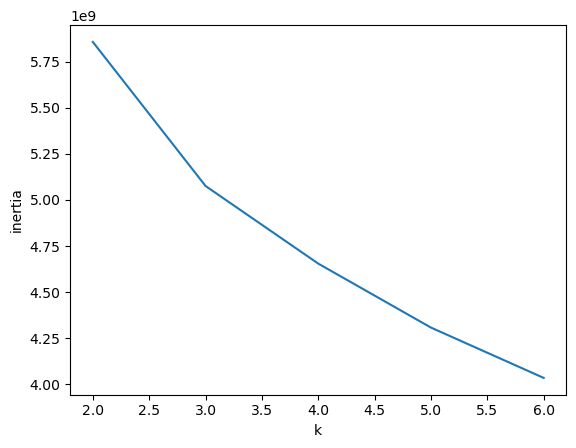

In [58]:
# 이니셔 계산
inertia = []
for k in range(2, 7):
    km = KMeans(n_clusters=k, n_init='auto', random_state=42)
    km.fit(fruits_2d)
    inertia.append(km.inertia_)
plt.plot(range(2, 7), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

## 06-3 주성분 분석
- 차원축소 할때에 진행

### 차원, 차원 축소
- 차원 dimension : 일단 feature를 지칭한다고 이해하기
    - 예 : 과일 사진의 경우 10,000개의 픽셀 존재 = 10,000개 특성 존재 = 10,000개 차원 존재
- 차원 축소 dimensionality reduction
    - 비지도 학습중 하나

#### ‘2차원 배열’, '1차원 배열' 에서의 차웜과 다른건가요?
- 다차원 배열에서 차원은 배열의 축 개수가 됨
- 가령 2차원 배열일 때는 행과 열이 차원이 됨 
- 하지만 벡터일 경우에는 원소의 개수를 지칭

![alt text](appendix/image-18.png)

### PCA(Principal component analysis)
- 분산이 큰 방향으로 데이터 분포를 찾은 후(데이터의 분포를 가장 잘 표현 하는 방향을 찾고) 해당 방향을 가지는 벡터를 주성분(principal component)라고 부름
- 주성분 벡터의 원소 개수는 원본 데이터셋의 특성 개수와 같음 

![alt text](appendix/image-19.png)

- 샘플 데이터를 주성분에 직각으로 투영시키면(= **정사영 시키면**) 한개 값을 가지는 것으로 값(**벡터를 스칼라 값으로 변환**) 변환이 가능

#### 정사영 스칼라값 계산
1) 벡터 $\vec{a}$ 와 $\vec{b}$ 를 가정
2) 벡터 $\vec{a}$ 를 벡터 $\vec{b}$ 에 정사영한 스칼라 값은 아래와 같이 계산 됨

$$
\frac{\vec{a} \cdot \vec{b}}{\left\|\vec{b}\right\|}
$$

- 교재 예시 계산

![alt text](appendix/image-20.png)

![alt text](appendix/image-19.png)

1) $\vec{a}$ 는 $s(2, 4)$ 를 나타내는 위치 벡터, $\vec{b}$ 는 $(2, 1)$ 지나는 직선 벡터 이라고 가정 

2) 두 벡터의 내적 계산
$$
\vec{a} \cdot \vec{b} = 2 \times 2 + 4 \times 1 = 8
$$

4) $\vec{b}$ 의 스칼라(크기) 계산
$$
\left\|\vec{b}\right\| = \sqrt{2^2 + 1^2} = \sqrt{5}
$$

5) 최종 계산
$$
\frac{\vec{a} \cdot \vec{b}}{\left\|\vec{b}\right\|} = \frac{8}{\sqrt{5}} \approx \frac{8}{2.236} = 3.577
$$

- 첫번째 주성분을 찾은 후 해당 벡터에 수직이고 분산이 가장큰 다음 방향 벡터가 두번째 주성분이 됨.
- 일반적으로 주성분은 원본 특성이 갯수만큼 찾을 수 있음
> 기술적인 이유로 주성분은 원본 특성의 개수와 샘플 개수 중 작은 값만큼 찾을 수 있음. 일반적으로 비지도 학습은 대량의 데이터에서 수행하기 때문에 원본 특성의 개수만큼 찾을 수 있다고 함

##### 참고 : 정사영된 좌표 계산
1) 벡터 $\vec{a}$ 와 $\vec{b}$ 를 가정
2) 벡터 $\vec{a}$ 를 벡터 $\vec{b}$ 에 정사영한 벡터 값은 아래와 같이 계산 됨

$$
\text{proj}_{\vec{b}}\vec{a}=\frac{\vec{a}\cdot \vec{b}}{\vec{b}\cdot \vec{b}}\vec{b}
$$

 교재 예시 계산

![alt text](appendix/image-20.png)

![alt text](appendix/image-19.png)

1) $(2,4)$ 는 벡터 $\vec{a}=\left(\begin{matrix}2\\ 4\end{matrix}\right)$
점 $(2,1)$ 을 지나는 직선은 원점을 지나는 벡터 $\vec{b}=\left(\begin{matrix}2\\ 1\end{matrix}\right)$ 로 가정

2) 두 벡터의 내적 계산
$$
\vec{a} \cdot \vec{b} = 2 \times 2 + 4 \times 1 = 8
$$

4) $\vec{b}$ 의 내적 계산
$$
\vec{a} \cdot \vec{b} =  2 \times 2 + 1 \times 1 = 5
$$

5) 최종 계산
$$
\frac{\vec{a}\cdot \vec{b}}{\vec{b}\cdot \vec{b}}=\frac{8}{5}   
$$
$$
\frac{\vec{a}\cdot \vec{b}}{\vec{b}\cdot \vec{b}}\vec{b} =\frac{8}{5} \left(\begin{matrix}2\\ 1\end{matrix}\right) = \left(\begin{matrix}\frac{16}{5}\\ \frac{8}{5}\end{matrix}\right)
$$

### PCA 클라스
- `sklearn. decomposition`모듈 아래 PCA 클래스로 주성분 분석 알고리즘을 제공
- PCA 클래스의 객체를 만들 때 `n_components` 매개변수에 주성분의 개수를 지정해야 함 
- k-평균과 마찬가지로 비지도 학습이기 때문에 `fit()` 메서드에 타깃값을 제공하지 않음

In [61]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(fruits_2d)


PCA(n_components=50)

In [62]:
# PCA 클래스가 찾은 주성분 확인
print(pca.components_.shape)


(50, 10000)


- `n_components`를 50으로 지정했기 때문에 `pca.components_`배열의 첫 번째 차원이 50(50개의 주성분을 찾음)
- 원본 데이터와 차원이 같으므로 주성분을 $100 \times 100$ 크기의 이미지처럼 출력이 가능

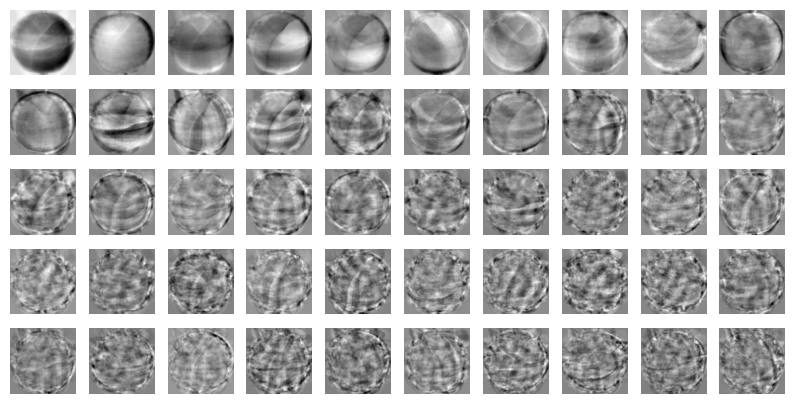

In [64]:
# 이전에 만든 draw_fruits 함수 사용ㅇ
draw_fruits(pca.components_.reshape(-1, 100, 100))


- 이 주성분은 원본 데이터에서 가장 분산이 큰 방향을 순서대로 나타냄
- 데이터 셋에 있는 어떤 특징을 잡아낸 것으로도 생각이 가능
- 원본 데이터를 주성분에 투영하여 특성의 개수를 10,000개에서 50개로 줄일 수 있음

In [65]:
print(fruits_2d.shape)

(300, 10000)


In [ ]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


- $(300, 10000)$ 크기 array(10,000개의 픽셀(특성)을 가진 300개의 이 
미지)에서 $(300, 50)$ 크기 배열로 변환. 즉 `fruits_pca`는 50개 특성을 가진 데이터임

> 주성분 분석은 데이터 변환이 목적이므로 predictO 메서드를 제공하지 않음

### 원상복구 방법
- 사실 이미 어느정도 데이터 손실이 발생하여 완벽히 복구는 불가능
- 그래도 처음 변환 당시에 분산이 큰 방향으로 데이터를 투영했기에 최대한 원본 데이터에 가깝게 재구성이 가능

In [ ]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


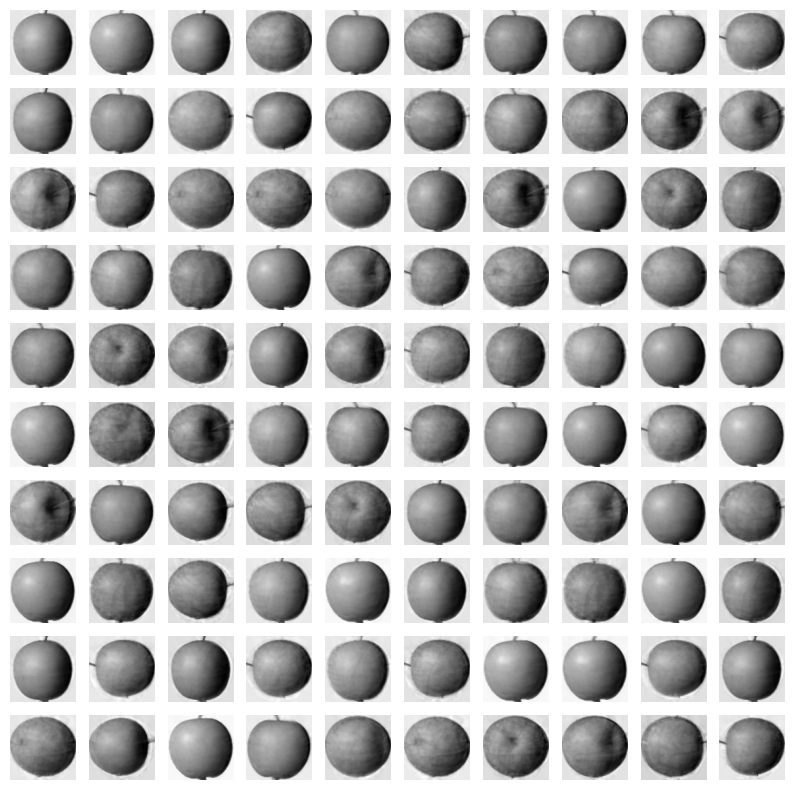

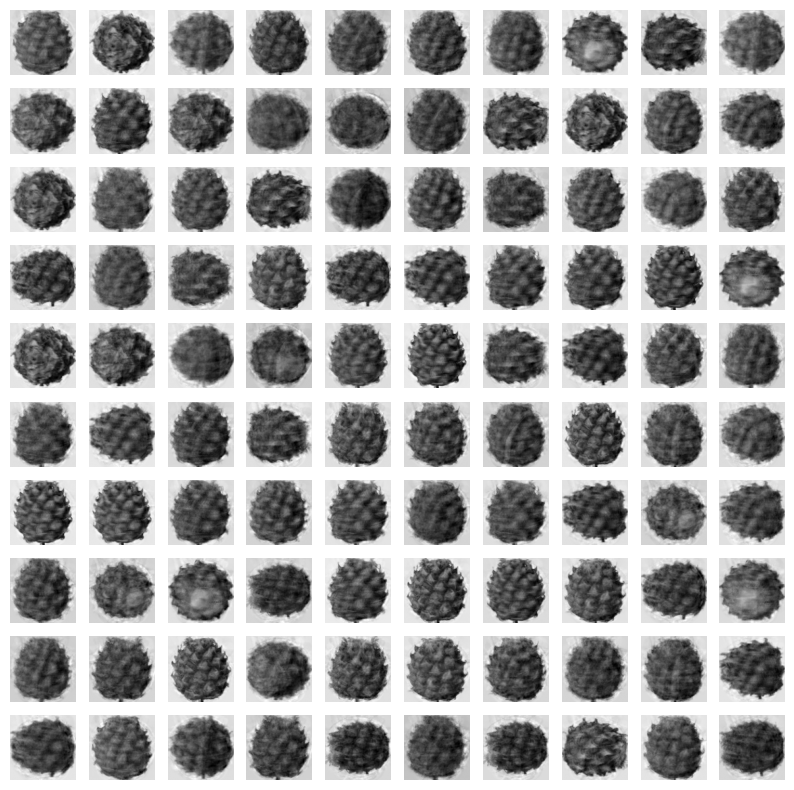

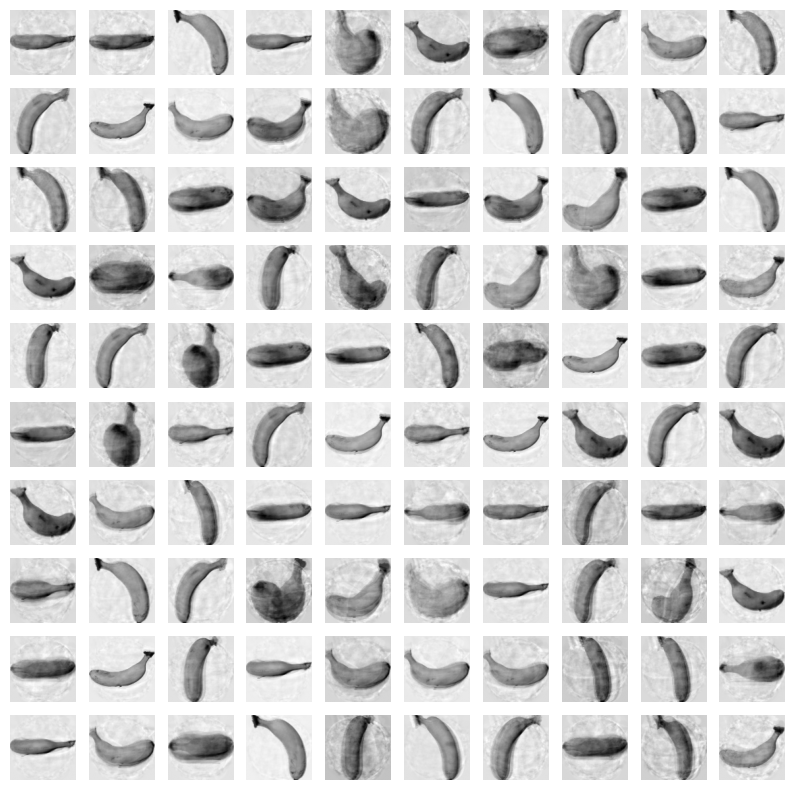

In [68]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
   draw_fruits(fruits_reconstruct[start:start+100]) 
   print("\n")


- 일단 바나나 기준 뭔가 뭉개져 보이는 이미지들이 존재
- 그래도 원판에 가깝지 않을까 생각됨

### 설명된 분산 Explained variance
- 주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값
- PCA 클래스의 `explained_variance_ratio`가 각 주성분의 설명된 분산 비율이 기록
- 당연히 첫 번째 주성분의 설명된 분산이 가장 크며, 이 분산 비율을 모두 더하면 50개의 주성분으로 표현하고 있는 총 분산 비율을 얻을 수 있음

In [69]:
print(np.sum(pca.explained_variance_ratio_))

0.9215335513734251


- 분산 결과가 92%에 육박

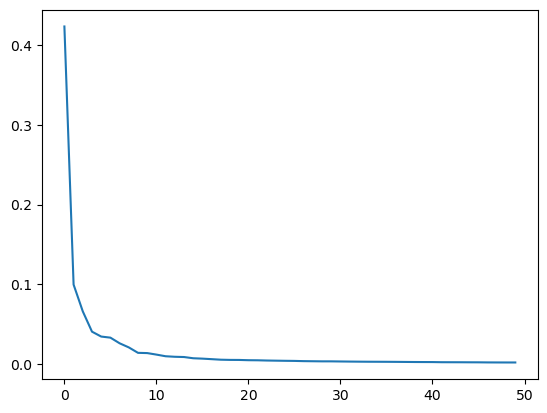

In [70]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

- 그래프 결과 역시 주성분이 10개 정도로 체크할 수 있음

### 다른 알고리즘과 함께 사용하기
- 과일 사진 원본 데이터와 PCA로 축소한 데이터를 지도 학습에 적용해 보고 어떤 차이가 있는지 확인
- 3개의 과일 사진을 분류해야 하므로 간단히 로지스틱 회귀 모델을 사용

In [71]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

- 타깃값은 사과를 0, 파인애플을 1, 바나나를 2로 지정

In [72]:
target = np.array([0]*100 + [1]*100 + [2]*100)

In [76]:
# 원본인 Fruits_2d로 확인
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target) 
print(np.mean(scores['test_score'])) 
print(np.mean(scores['fit_time']))

0.9966666666666667
1.2906114101409911


In [75]:
# 축소된 fruits_pca로 비교
scores = cross_validate(lr, fruits_pca, target) 
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.009902381896972656


- `test_score`는 비슷한 수준을 유지
- `fit_time`은 1.29에서 0.009로 감소

- PCA 클래스를 사용할 때 `n_components` 매개변수에 주성분의 개수를 지정했는데, 대신 원하는 설명된 분산의 비율(사용자가 지정한 분산 비율)에 도달할 때까지 자동으로 주성분을 찾도록 할 수도 있음

In [ ]:
pca = PCA(n_components=0.5) # 분산의 50% 도달할 때까지
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [78]:
print(pca.n_components_)

2


In [79]:
fruits_pca = pca.transform(fruits_2d) 
print(fruits_pca.shape)

(300, 2)


In [87]:
scores = cross_validate(lr, fruits_pca, target) 
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.99
0.0188570499420166


/home/user/miniforge3/envs/mldl/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/user/miniforge3/envs/mldl/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

>  로지스틱 회귀 모델이 완전히 수렴하지 못했으니 `max_iter`를 늘려 반복 횟수를 증가하라는 경고(Convergence Warning： Ibfgs failed to converge)가 출력되나 하지만 교차 검증의 결과가 충분히 좋기 때문에 무시해도 상관 없음

- 특성 2개를 사용했는데 정확도가 99퍼임

In [89]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42) 
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


- `fruits_pca`로 찾은  k-평균 알고리즘 결과도 각 클러스터별로 110개, 99개, 91개의 샘플을 포함

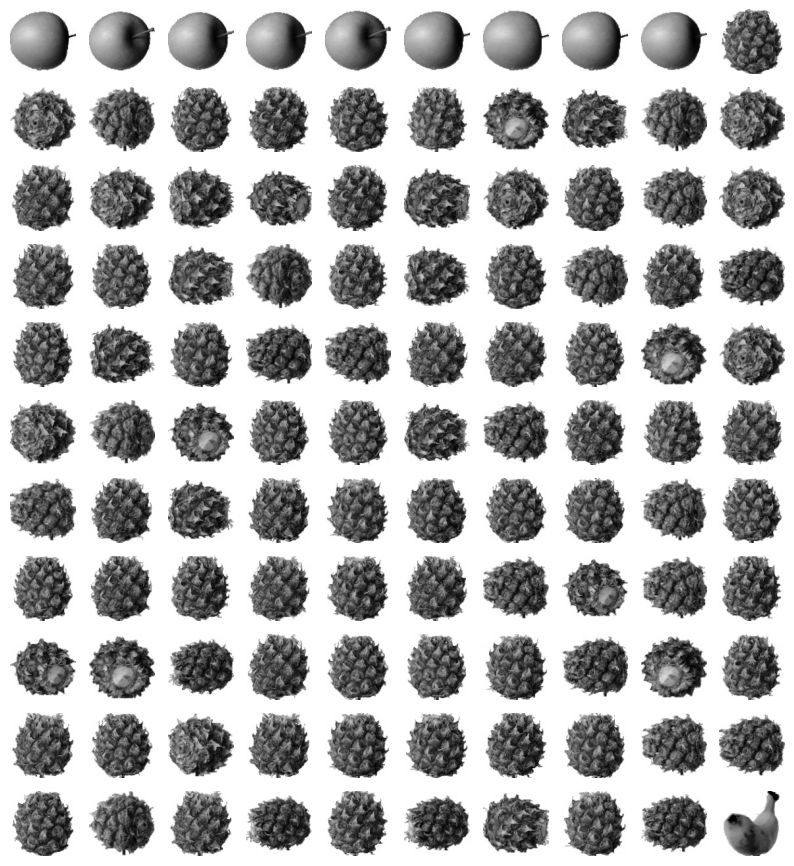

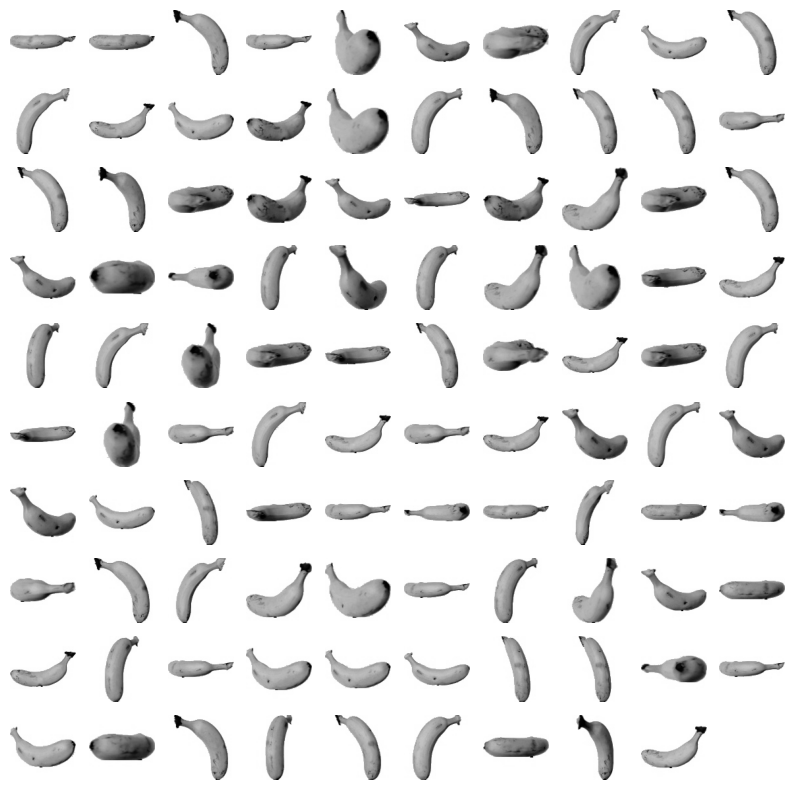

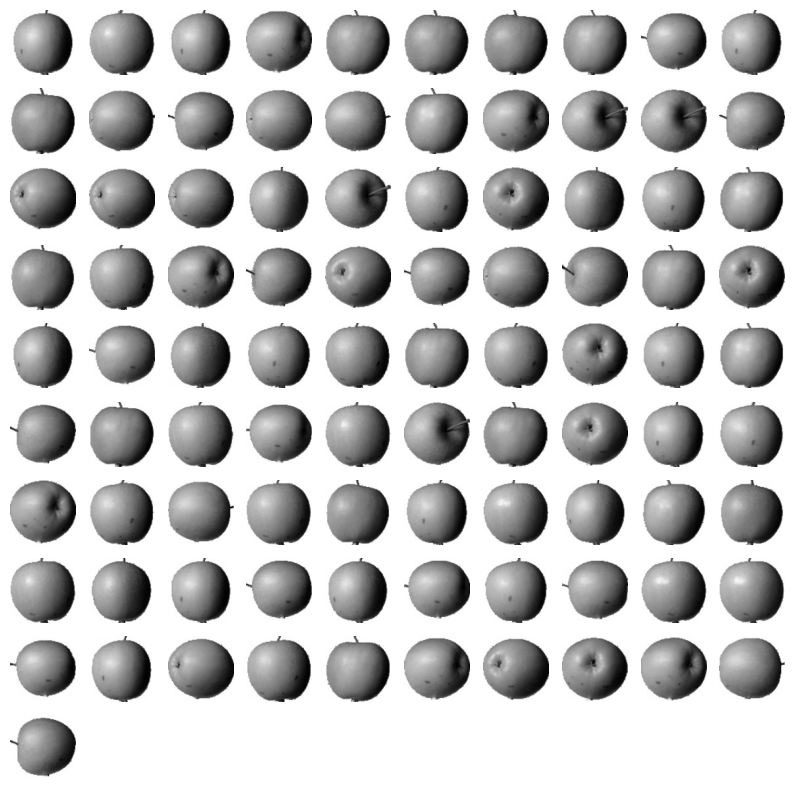

In [90]:
for label in range(0, 3):
   draw_fruits(fruits[km.labels_ == label]) 
   print("\n")


- 2절에서 찾은 클러스터와 비슷하게 몇 개의 사과가 파인애플 클러스터에 포함됨

- 차원을 줄이면 시각화도 간략하게(산점도에 표기한다던지) 가능
- 즉 `fruits_pca` 데이터는 2개의 특성이 있기 때문에 2차원으로 표현 가능
- 앞에서 찾은 `km.labels_`를 사용해 클러스터별로 나누어 산점도를 그릴 수 있음

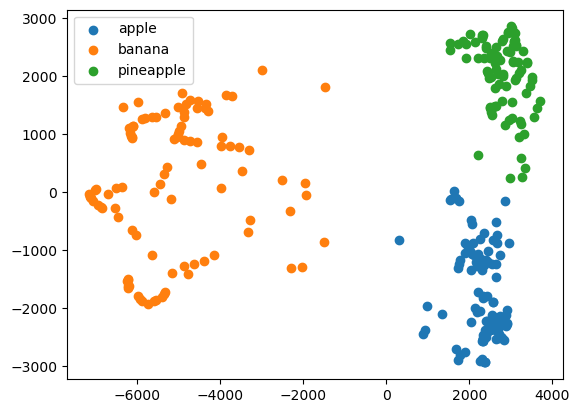

In [91]:
for label in range(0, 3):
   data = fruits_pca[km.labels_ == label]
   plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple']) 
plt.show()